### All modifications - repeat 10 times, more epochs and samples

This experiment involves the default setup for all the parameters, however with the reduced dataset size to 15000, as explained in the write up. The expeirment is repeated 10 times, and here, we are interested in measurement consistency, i.e. throughput dispersion between different experiments. 
Also, we consider two different execution environments, IARAI and TU.

In [4]:
from benchmarking.analysis.analyze_results import *

In [5]:
# dataset size
samples = 35000

Data loading function:

In [17]:
def load_all_experiments(output_base_folder, base_folder):
    results_scratch = []
    results_s3 = []
    for folder_index in range(1, 11):
        print(f"Working with {folder_index}")
        s3_folder_filter= base_folder + str(folder_index) + "/s3/*benchmark_e2e*"
        scratch_folder_filter= base_folder + str(folder_index) + "/scratch/*benchmark_e2e*"

        # read data
        df_dataloader_s3 = extract_timelines(output_base_folder, folder_filter=s3_folder_filter)
        df_dataloader_scratch = extract_timelines(output_base_folder, folder_filter=scratch_folder_filter)

        # Get unique functions 
        unique_functions_scratch = np.unique(df_dataloader_scratch["item_x"])
        print(f"Unique functions: {unique_functions_scratch}")

        unique_runs_scratch = np.unique(df_dataloader_scratch["run"])
        unique_runs_s3 = np.unique(df_dataloader_s3["run"])

        # extract GPU UTIL
        df_gpuutil_scratch = extract_gpuutil(output_base_folder, folder_filter=scratch_folder_filter)
        unique_runs_scratch = np.unique(df_dataloader_scratch["run"])

        df_gpuutil_s3 = extract_gpuutil(output_base_folder, folder_filter=s3_folder_filter)
        unique_runs_s3 = np.unique(df_dataloader_s3["run"])

        # Get data for scratch
        returns_scratch = []
        for run in sorted(unique_runs_scratch):
            df = df_dataloader_scratch[df_dataloader_scratch["run"]==run]
            dfgpu = df_gpuutil_scratch[df_gpuutil_scratch["run"]==run]
            returns_scratch.append(get_gpu_stats(df, dfgpu, run, False, True, False, 2))
        result = pd.DataFrame.from_records(data=returns_scratch)
        result["throughput"] = samples / result["runtime"]
        results_scratch.append(result)

        # Get data for S3
        returns_s3 = []
        for run in sorted(unique_runs_s3):
            df = df_dataloader_s3[df_dataloader_s3["run"]==run]
            dfgpu = df_gpuutil_s3[df_gpuutil_s3["run"]==run]
            returns_s3.append(get_gpu_stats(df, dfgpu, run, False, True, False, 2))
        result = pd.DataFrame.from_records(data=returns_s3)
        result["throughput"] = samples / result["runtime"]
        results_s3.append(result)
    return results_s3, results_scratch

In [42]:
impls = ["threaded", "asyncio", "vanilla"]
libs = ["torch"]

In [43]:
def add_stats(throughputs):
    df = throughputs.T

    mean = df.mean(axis=1)
    var = df.var(axis=1)
    std = df.std(axis=1)

    df["mean"] = mean.round(2)
    df["var"] = var.round(2)
    df["std"] = std.round(2)
    return df

### TU environment

In [44]:
# setup folders
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking-raw/referenced-experiments/repeated_long_e2e")
base_folder = "1612_run_"

# Load data
results_s3, results_scratch = load_all_experiments(output_base_folder, base_folder)

Working with 1


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:04<00:00, 203.64it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 962/962 [00:02<00:00, 326.33it/s]


Working with 2


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:04<00:00, 218.05it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:03<00:00, 307.19it/s]


Working with 3


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:04<00:00, 205.96it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 962/962 [00:03<00:00, 317.86it/s]


Working with 4


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 962/962 [00:04<00:00, 220.13it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 959/959 [00:03<00:00, 308.84it/s]


Working with 5


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 959/959 [00:04<00:00, 204.65it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 959/959 [00:03<00:00, 300.25it/s]


Working with 6


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:04<00:00, 213.61it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 958/958 [00:03<00:00, 313.72it/s]


Working with 7


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:04<00:00, 210.58it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 961/961 [00:02<00:00, 329.85it/s]


Working with 8


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 961/961 [00:04<00:00, 206.22it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 959/959 [00:03<00:00, 311.77it/s]


Working with 9


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:04<00:00, 206.14it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 960/960 [00:03<00:00, 305.12it/s]


Working with 10


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:04<00:00, 204.86it/s]


Unique functions: ['batch' 'run_training_batch' 'training_batch_to_device']


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [00:03<00:00, 294.40it/s]


In [45]:
# Check the sizes
print(f"Experiments loaded ... S3: {len(results_s3)}, Scratch: {len(results_scratch)}")

Experiments loaded ... S3: 10, Scratch: 10


In [54]:
def plot_all_histograms_tmp(res, impls, libs, display=True):
    df_throughput_all = pd.DataFrame()
    for impl in impls:
        for lib in libs:
            throughput = []
            key = f"{impl}_{lib}"
            print(f"Using key: {key}")
            for experiment in range(len(res)):
                data = res[experiment].round(2)
                data = data[(data["library"] == lib) & (data["implementation"] == impl)]["throughput"]
                throughput.append(data)
#               k = pd.DataFrame.from_records(throughput)
            df_throughput_all[str(key)] = pd.DataFrame.from_records(throughput)
#             if display:
#                 plot_histogram(throughput, f"Setup: {impl}, {lib}")
    return df_throughput_all

In [55]:
throughput_all_s3 = plot_all_histograms_tmp(results_s3, impls, libs, True) # display = False (doesn't plot histogrms)

Using key: threaded_torch
Using key: asyncio_torch
Using key: vanilla_torch


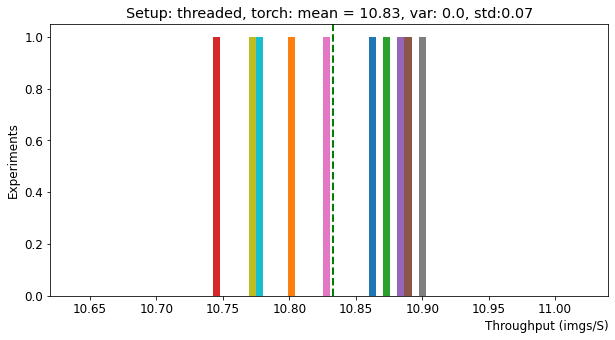

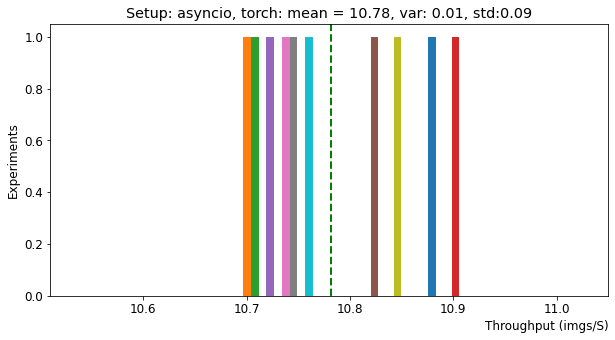

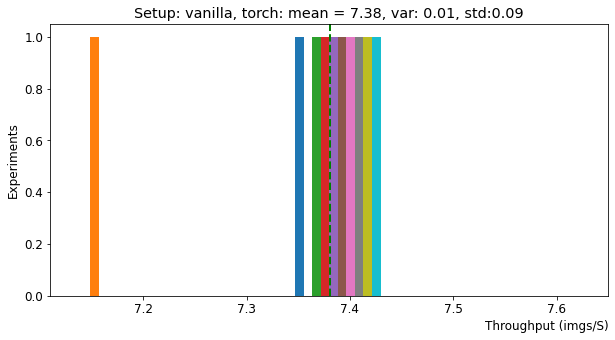

In [56]:
throughput_all_scratch = plot_all_histograms(results_scratch, impls, libs, True) # display = False (doesn't plot histogrms)

In [49]:
df_t_s3 = add_stats(throughput_all_s3)
df_t_s3

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,4.75,4.85,4.90,4.84,4.96,4.77,4.84,4.76,4.79,4.79,4.82,0.0,0.07
asyncio_torch,4.35,4.36,4.40,4.36,4.29,4.29,4.32,4.35,4.32,4.34,4.34,0.0,0.03
vanilla_torch,0.46,0.45,0.43,0.43,0.43,0.43,0.45,0.44,0.43,0.43,0.44,0.0,0.01


In [50]:
df_t_scratch = add_stats(throughput_all_scratch)
df_t_scratch

,0,1,2,3,4,5,6,7,8,9,mean,var,std
threaded_torch,10.90,10.81,10.87,10.72,10.86,10.92,10.80,10.92,10.76,10.77,10.83,0.01,0.07
asyncio_torch,10.91,10.75,10.68,10.96,10.71,10.82,10.73,10.77,10.79,10.70,10.78,0.01,0.09
vanilla_torch,7.43,7.13,7.42,7.43,7.36,7.41,7.44,7.40,7.37,7.42,7.38,0.01,0.09


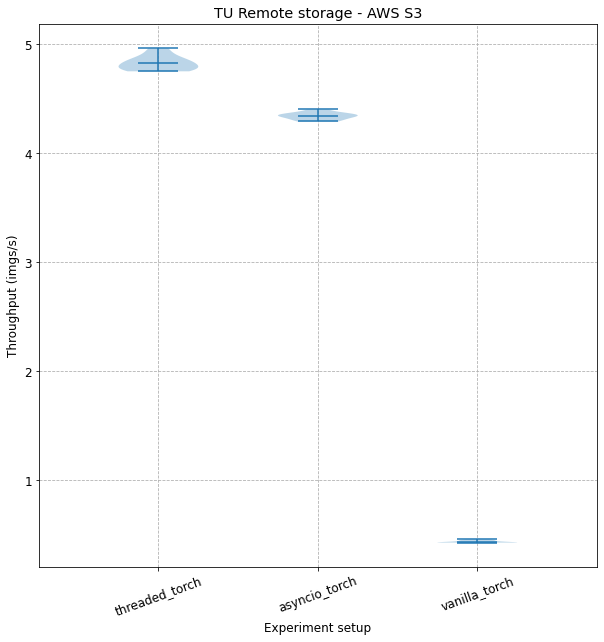

In [51]:
plot_violins(df_t_s3, "TU Remote storage - AWS S3")

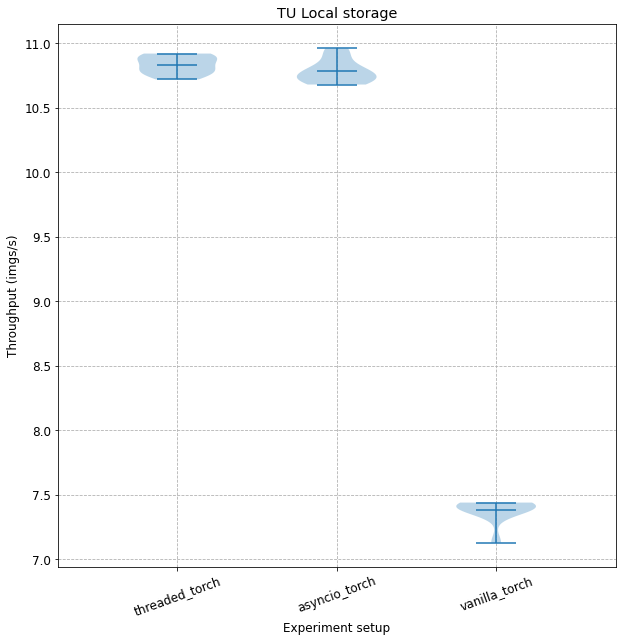

In [57]:
plot_violins(df_t_scratch, "TU Local storage")

Concave?

In [6]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking/benchmark_output/repeated_long_e2e/1612_run_1/s3/")
df_dataset = extract_pandas(output_base_folder, folder_filter="**/*benchmark_e2e*")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 962/962 [02:39<00:00,  6.03it/s]


In [7]:
group_by_dataset=["dataset", "pool_size"]
experiment_thr = "20211217f162804_benchmark_e2e_torch_s3_256_4_16_1_threaded_sync"
experiment_vnl = "20211217f223227_benchmark_e2e_torch_s3_256_4_16_1_vanilla_sync"
experiment_asy = "20211217f192444_benchmark_e2e_torch_s3_256_4_16_1_asyncio_sync"
experiments = [experiment_thr, experiment_vnl, experiment_asy]

output_base_folder_timeline_dataset_thr = output_base_folder / experiment_thr
output_base_folder_timeline_dataset_vnl = output_base_folder / experiment_vnl
output_base_folder_timeline_dataset_asy = output_base_folder / experiment_asy

In [8]:
with (output_base_folder_timeline_dataset_thr / "metadata.json").open() as f:
    metadata = json.load(f)
print(metadata)

{'arch': 'resnet18', 'num_workers': 4, 'epochs': 80, 'start_epoch': 0, 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0001, 'print_freq': 10, 'resume': '', 'evaluate': False, 'pretrained': False, 'world_size': -1, 'rank': -1, 'dist_url': 'tcp://224.66.41.62:23456', 'dist_backend': 'nccl', 'gpu': 2, 'multiprocessing_distributed': False, 'seed': 42, 'fetch_impl': 'threaded', 'dataset_limit': 35000, 'num_fetch_workers': 16, 'prefetch_factor': 2, 'dataset': 's3', 'output_base_folder': '1612_run_1', 'batch_size': 256, 'pin_memory': 0, 'use_cache': 1, 'batch_pool': 512, 'num_sanity_val_steps': 0, 'distributed': False, 'system': 'Linux', 'node': 'tu-fat-1', 'release': '4.19.0-18-amd64', 'version': '#1 SMP Debian 4.19.208-1 (2021-09-29)', 'machine': 'x86_64', 'processor': ''}


### S3

5600000
5600000
5600000


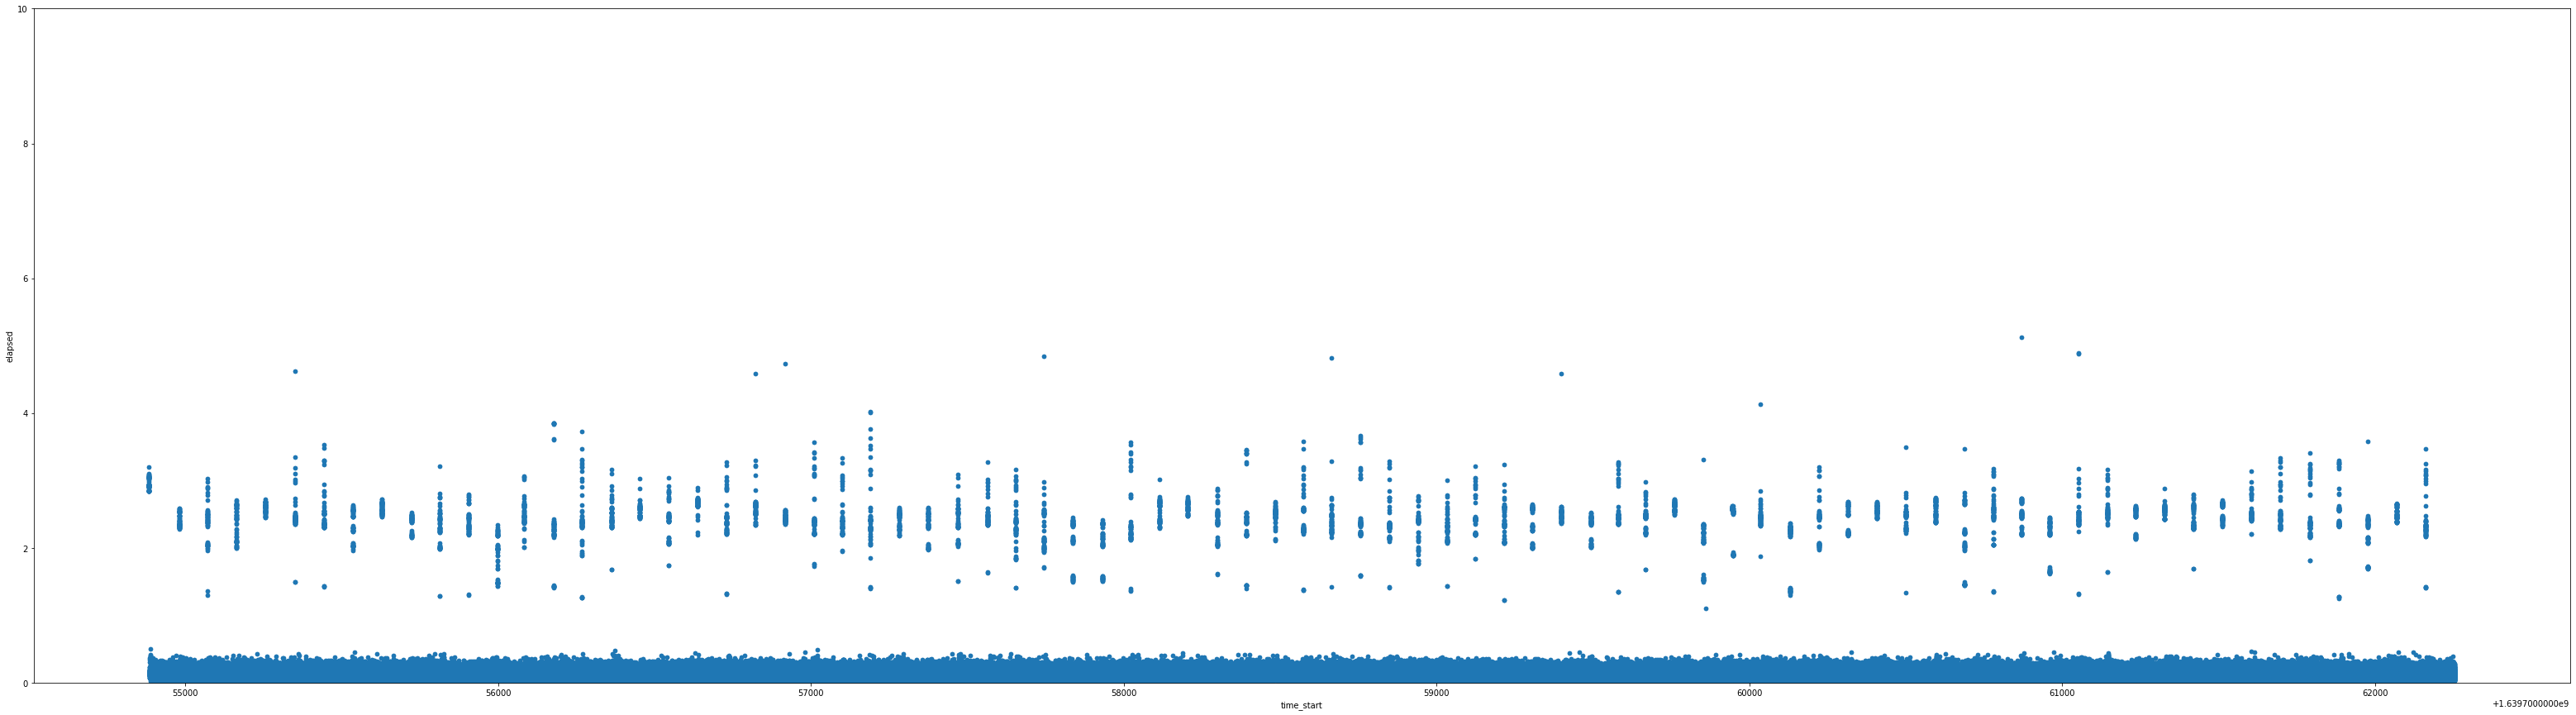

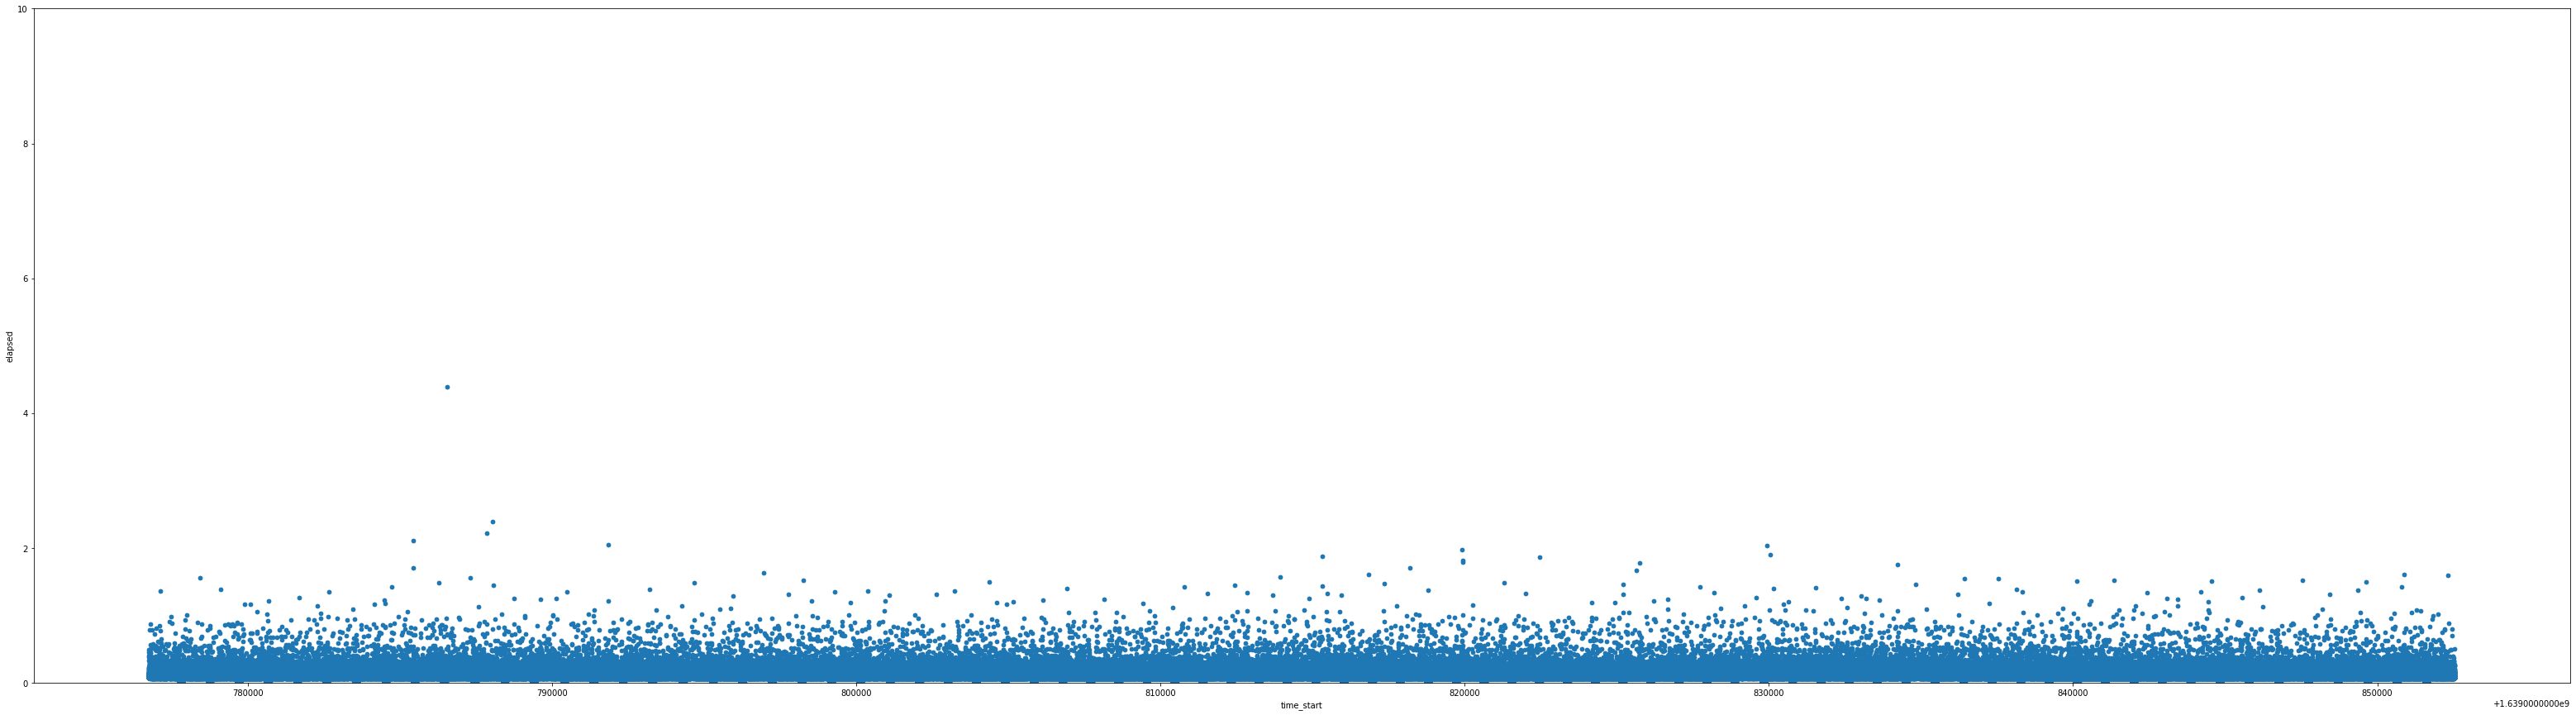

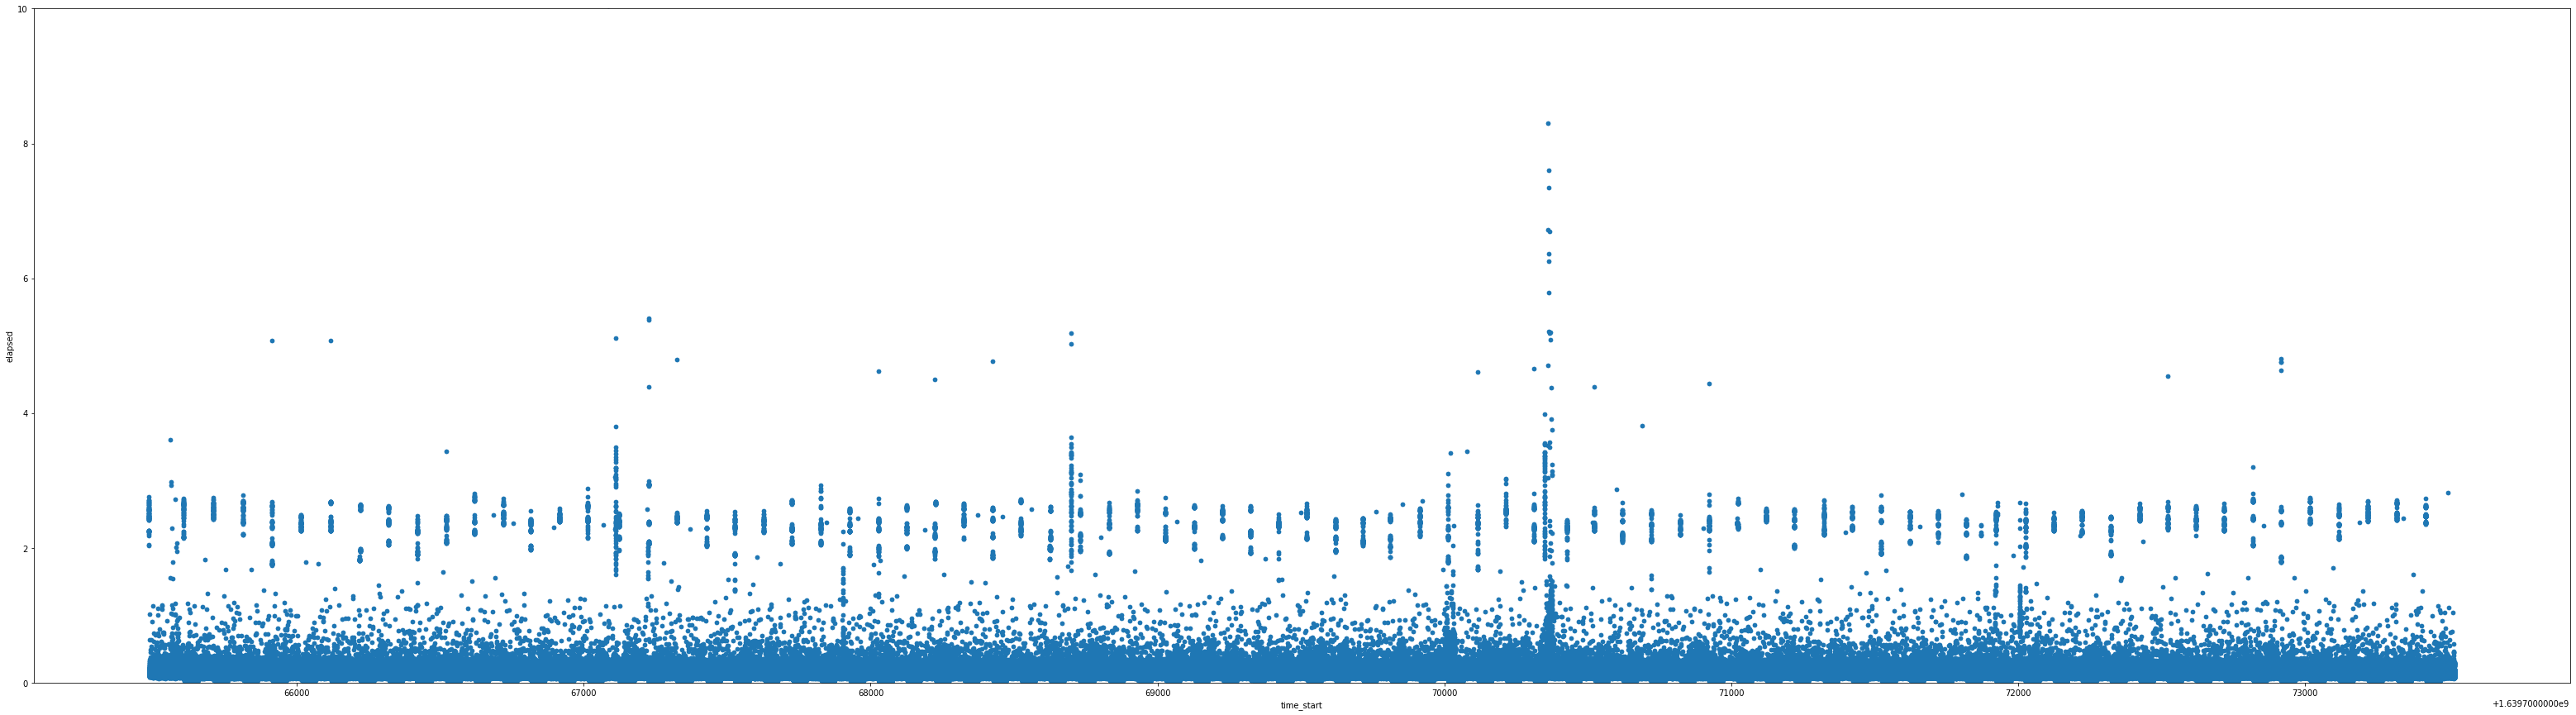

In [25]:
for experiment in experiments:
    df = df_dataset[df_dataset["run"]==experiment]
    df = df[df["function_name"]=="__getitem__"] #[:30000]
    print(len(df))
    # display(df.head())
    df.plot.scatter(x="time_start", y="elapsed", ylim=(0, 10), figsize=(55,15))
#     df.plot.scatter(x="time_end", y="elapsed", ylim=(0, 10), xlim=(0, 1639765646.5023496), figsize=(55,15))
#     break

In [26]:
df["time_end"][50000]

1639765646.5023496

In [133]:
# fig, axes = plt.subplots(nrows=1, ncols=1)
# df.hist(column="time_end", bins=int(df["time_end"].max()-df["time_start"].min())*10, ax=axes)
# axes.axvline(df["time_start"].min(), color="red")
# axes.axvline(df["time_end"].max(), color="red")
# fig.suptitle("throughput [#/ds]")

In [134]:
# fig, axes = plt.subplots(nrows=1, ncols=1)
# df.hist(column="time_start", bins=int(df["time_end"].max()-df["time_start"].min())*10, ax=axes)
# axes.axvline(df["time_start"].min(), color="red")
# axes.axvline(df["time_end"].max(), color="red")
# fig.suptitle("throughput [#/ds]")

In [140]:
output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking/benchmark_output/repeated_long_e2e/1612_run_1/scratch/")
df_dataset = extract_pandas(output_base_folder, folder_filter="**/*benchmark_e2e*")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 963/963 [03:11<00:00,  5.02it/s]


In [141]:
# output_base_folder = Path("/iarai/home/ivan.svogor/storage-benchmarking/benchmark_output/repeated_long_e2e/1612_run_1/scratch/")
group_by_dataset=["dataset", "pool_size"]
experiment_thr = "20211217f183104_benchmark_e2e_torch_scratch_256_4_16_1_threaded_sync"
experiment_vnl = "20211217f213850_benchmark_e2e_torch_scratch_256_4_16_1_asyncio_sync"
experiment_asy = "20211218f193559_benchmark_e2e_torch_scratch_256_4_16_1_vanilla_sync"
experiments = [experiment_thr, experiment_vnl, experiment_asy]

output_base_folder_timeline_dataset_thr = output_base_folder / experiment_thr
output_base_folder_timeline_dataset_vnl = output_base_folder / experiment_vnl
output_base_folder_timeline_dataset_asy = output_base_folder / experiment_asy

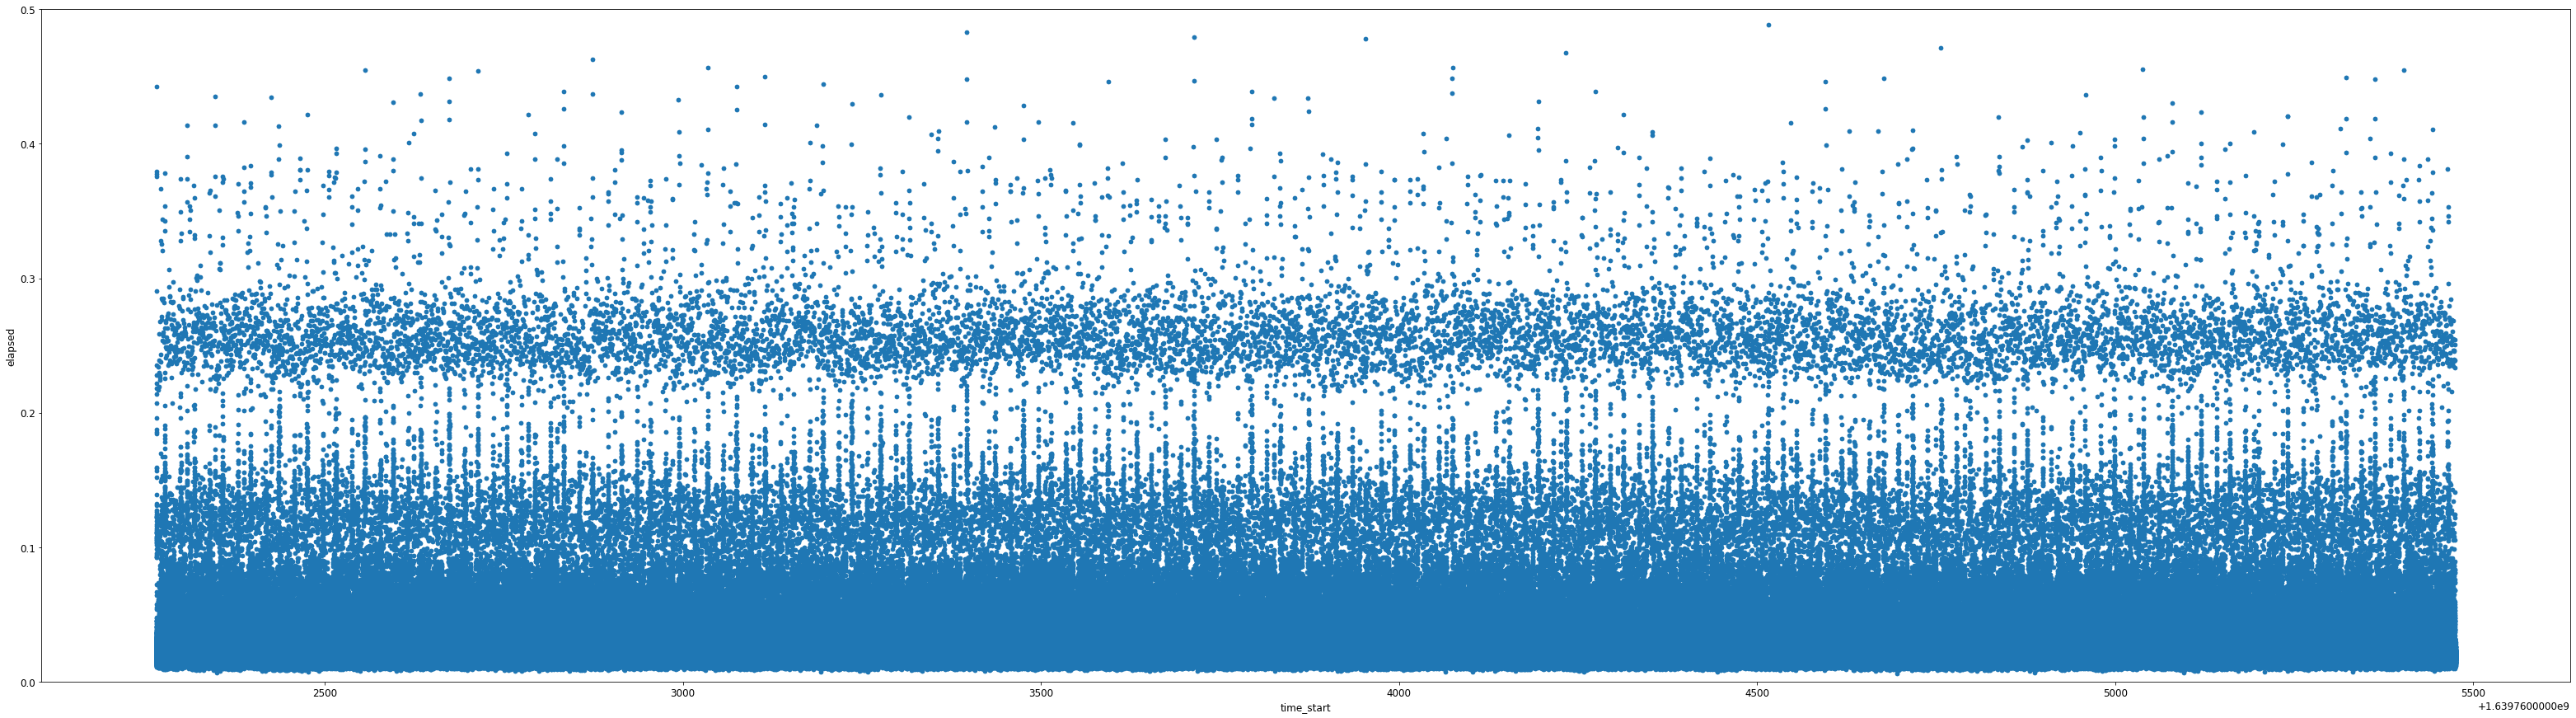

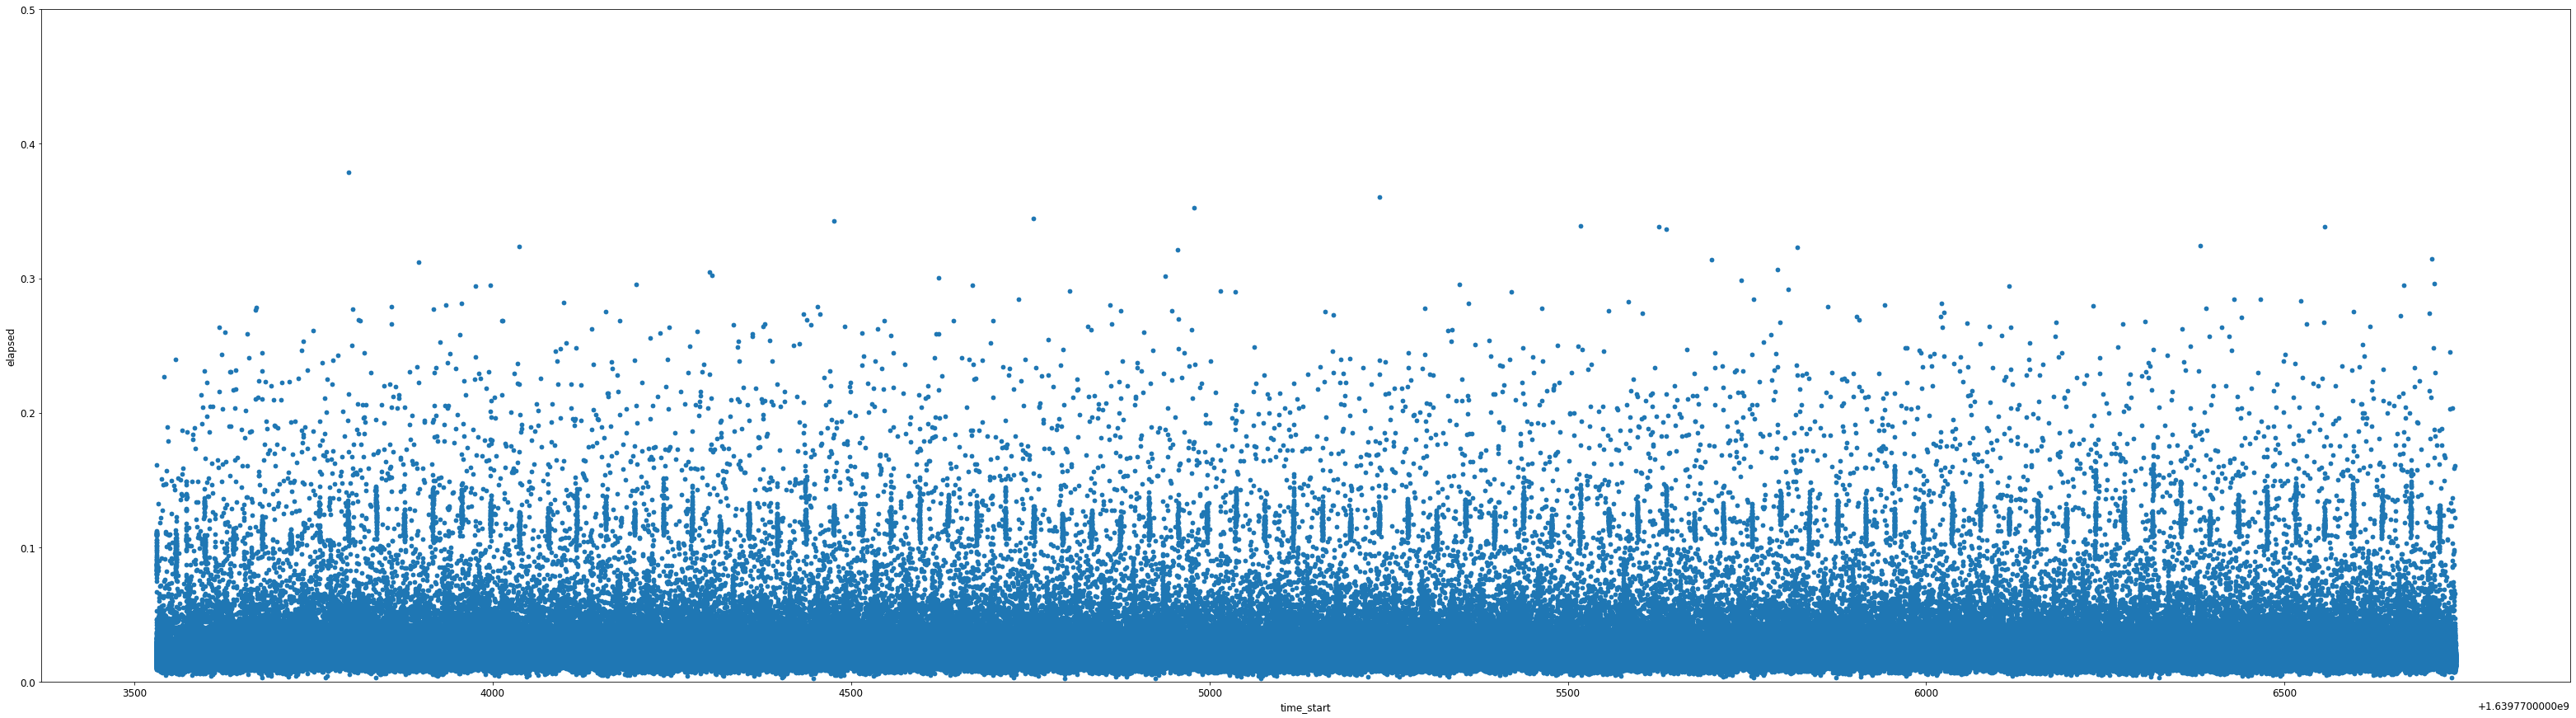

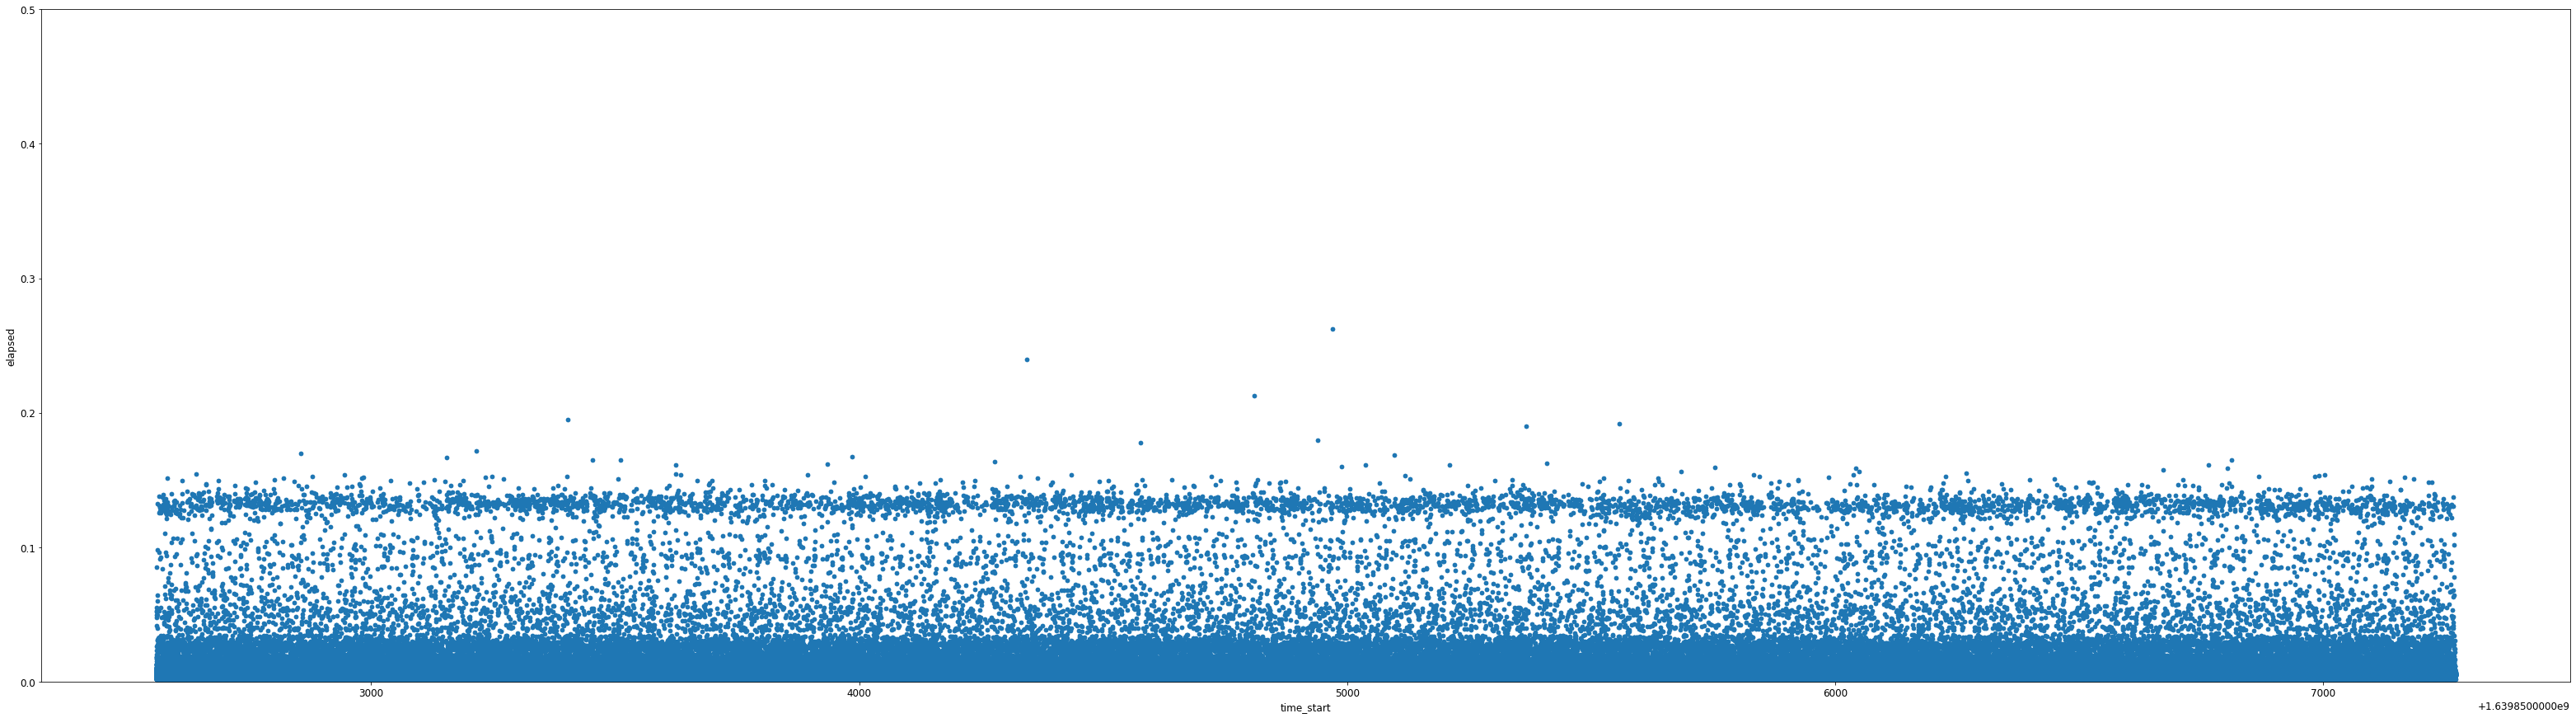

In [147]:
for experiment in experiments:
    df = df_dataset[df_dataset["run"]==experiment]
    df = df[df["function_name"]=="__getitem__"]
    # display(df.head())
    df.plot.scatter(x="time_start", y="elapsed", ylim=(0, 0.5), figsize=(55,15))
#     df.plot.scatter(x="time_end", y="elapsed", figsize=(55,15))    

In [117]:
# df = df_dataset[df_dataset["run"]==experiment]
# unique_functions = np.unique(df["function_name"])

In [118]:
# unique_functions

array(['__getitem__', 'fetch'], dtype=object)